In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
transform = transforms.ToTensor()

In [6]:
train_data = datasets.MNIST(root='./data',train=True,download=False,transform=transform)
test_data = datasets.MNIST(root='./data',train=False,download=False,transform=transform)

100.1%

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


113.5%

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


100.4%

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


180.4%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


../torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [7]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)
        x = x.view(-1,5*5*16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [10]:
torch.manual_seed(3)
model = CNNModel()
batchsize = 5

In [11]:
train_loader = DataLoader(train_data, batch_size = batchsize, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 10000,shuffle=False)

for i, (X_train, y_train) in enumerate(train_loader):
    y_pred = model(X_train)
    break

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [13]:
epochs = 3
loss_list = []
accuracy_list = []

In [14]:
loss_temp = 0

In [18]:
for epoch in range(epochs):
    correct_counter = 0
    
    for i, (X_train, y_train) in enumerate(train_loader):
        i=i+1
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        
        predicted_y = torch.max(y_pred.data, 1)[1]
        correct_temp = (predicted_y == y_train).sum()
        correct_counter+=correct_temp
        loss_temp += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i%1200 == 0:
            lossval = loss_temp/1200
            print(f'Epoch: {epoch+1} {5*i}/60000 loss: {lossval:.3f} accuracy: {correct_counter.item()*100/(6000):.3f}')
            
            loss_list.append(lossval)
            accuracy_list.append(correct_counter.item()*100/6000)
            loss_temp = 0
            correct_couter=0

Epoch: 1 6000/60000 loss: 0.704 accuracy: 94.650
Epoch: 1 12000/60000 loss: 0.133 accuracy: 190.750
Epoch: 1 18000/60000 loss: 0.122 accuracy: 286.983
Epoch: 1 24000/60000 loss: 0.100 accuracy: 383.917
Epoch: 1 30000/60000 loss: 0.102 accuracy: 480.617
Epoch: 1 36000/60000 loss: 0.082 accuracy: 578.283
Epoch: 1 42000/60000 loss: 0.084 accuracy: 675.550
Epoch: 1 48000/60000 loss: 0.075 accuracy: 773.333
Epoch: 1 54000/60000 loss: 0.078 accuracy: 871.017
Epoch: 1 60000/60000 loss: 0.077 accuracy: 968.700
Epoch: 2 6000/60000 loss: 0.057 accuracy: 98.217
Epoch: 2 12000/60000 loss: 0.054 accuracy: 196.617
Epoch: 2 18000/60000 loss: 0.062 accuracy: 294.767
Epoch: 2 24000/60000 loss: 0.067 accuracy: 392.850
Epoch: 2 30000/60000 loss: 0.058 accuracy: 491.167
Epoch: 2 36000/60000 loss: 0.048 accuracy: 589.667
Epoch: 2 42000/60000 loss: 0.059 accuracy: 687.767
Epoch: 2 48000/60000 loss: 0.060 accuracy: 786.217
Epoch: 2 54000/60000 loss: 0.054 accuracy: 884.350
Epoch: 2 60000/60000 loss: 0.057 ac

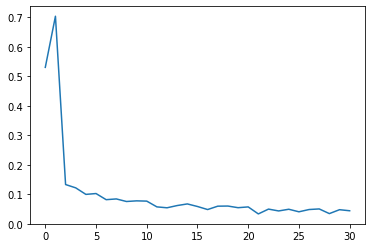

In [19]:
plt.plot(loss_list)

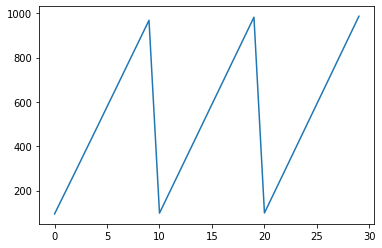

In [20]:
plt.plot(accuracy_list)

In [21]:
test_accuracy = 0

with torch.no_grad():
    for i,(X_test,y_test) in enumerate(test_loader):
        y_val = model(X_test)
        
        predicted = torch.max(y_val.data,1)[1]
        test_accuracy += (predicted == y_test).sum()
        print(f'{test_accuracy.item()*100/len(y_test)}%')

98.6%
